# **What we will do in this Analysis:**
> * Loan Applicants Segmentation
>> * Income
>> * Number Of Dependants
>> * Education
>> * Type of Employment
> * Applicants Loan Approval
>> * Rates of loan approval according to different features
>>> * Level of Education
>>> * Employment Status
>>> * Number of Dependents
>> * Loan Approved by CIBIL Score
> *  Correlation Analysis : Test for significance
>> * Income And Assets
>> * Asset value influence on loan amount
>> * Asset value influence on loan approvals
>> * Correlation between Income and Loan Amount
>> * Correlation between CIBIL Rating and loan status 
>> * Correlataion between loan status and self employment
> * Logistic Regression
>> * Build a predictive model that take loan application features and predicts the likelihood of loan approval.
>> * Determine accuracy of prediction

Import Python Libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as numpy
import seaborn as sns 
from scipy import stats
from scipy.stats import f_oneway # ANOVA Analysis
from scipy.stats import ttest_ind # Conducting a t-test
from scipy.stats import chi2_contingency # Statistical model for performing a chi-square analysis

Load the CSV

In [3]:
df=pd.read_csv('C:/Users/ASUS/Downloads/Loan Approval Dataset and project/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Checking the Shape of dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.shape

(4269, 13)

DataFrame Description

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


#### Data Cleaning
##### Checking For Duplicates

In [7]:
df.duplicated(keep=False).sum()

0

Convert Values in a column to absolute value

In [8]:
df[' residential_assets_value']=df[' residential_assets_value'].abs()
#count if there are negative values left
(df[' residential_assets_value']<0).sum()

0

Remove white spaces in coloumn names and all values

In [9]:
# Remove white spaces in coloumn names and all values
df.columns=df.columns.str.strip()

# Remove the leading or trailing Whitespaces from values in the dataframe
df=df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11848\282520564.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [11]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [12]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### CIBIL Rating 
> * CIBIL score are often used synonymously with credit score.
> * A credit score is based on a credit report.
> * Used to represent the creditworthiness of an individual.
> * The CIBIL Score renges between 300 and 900.
> * Lenders ,such as banks and credit card copmpanies , use credit score to evaluate the potential risk posed by lending money to customers.
>> * Score in Range 300-549 ----> poor
>> * Score in Range 550-649 ----> Average
>> * Score in Range 650-749 ----> Good
>> * Score in Range 750-900 ----> Excellent

### Addition of Columns in the dataframe
> Addition of the CIBIL rating column

In [13]:
def cibil_rating(value):
    if 300<=value<=549:
        return 'Poor'
    elif 550<=value<=649:
        return 'Average'
    elif 650<=value<=749:
        return 'Good'
    elif 750<=value<=900:
        return 'Excellent'
    else:
        return 'Error'
df['CIBIL ratings']=df['cibil_score'].apply(cibil_rating)
df.head()
    

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL ratings
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor


### Addition of the income levels column
> * income range 100000-1000000 ---> Income level 'low'
> * income range 1000001-4000000 ---> Income level 'lower-middle'
> * income range 4000001-7500000 ---> Income level 'Upper-Middle'
> * income range 7500001-10000000 ---> Income level 'High'

In [14]:
def income_level(value):
    if 100000<=value<=1000000:
        return 'Low'
    elif 1000001<=value<=4000000:
        return 'Lower-middle'
    elif 4000001<=value<=7500000:
        return 'Upper-middle'
    elif 7500001<=value<=10000000:
        return 'High'
    else:
        return 'Very High Income'
df['Income levels']=df['income_annum'].apply(income_level)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL ratings,Income levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High


### Adding a Loan Rating Column
> * Loan Range 100000-10000000----->Loan Rating 'Bronze'
> * Loan Range 10000001-20000000----->Loan Rating 'Silver'
> * Loan Range 20000001-30000000----->Loan Rating 'Gold'
> * Loan Range 30000001-40000000----->Loan Rating 'Platinum'

In [15]:
def loan_rating(value):
    if 100000<=value<=10000000:
        return 'Bronze'
    elif 10000001<=value<=20000000:
        return 'Silver'
    elif 20000001<=value<=30000000:
        return 'Gold'
    elif 30000001<=value<=40000000:
        return 'Platinum'
    else:
        return 'Error'
df['Loan Rating']=df['loan_amount'].apply(loan_rating)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL ratings,Income levels,Loan Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-middle,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


### Addition of loan term column
> *  Loan Term 0-7 ----> Loan Term Label 'Short-Term'
> *  Loan Term 8-14 ----> Loan Term Label 'Intermediate'
> *  Loan Term 15-20 ----> Loan Term Label 'Long-Term'

In [16]:
def loan_term_range(value):
    if 0<=value<=7:
        return 'Short-Term'
    elif 8<=value<=14:
        return 'Intermediate'
    elif 15<=value<=20:
        return 'Long-Term'
    else:
        return 'Error'
df['Loan Term Type']=df['loan_term'].apply(loan_term_range)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL ratings,Income levels,Loan Rating,Loan Term Type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-middle,Silver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term


### Adding a new column based on Dependents Class
> * Number of Dependents 0-1 ---> Dependents Class 'Low'
> * Number of Dependents 2-3 ---> Dependents Class 'Moderate'
> * Number of Dependents 4-5 ---> Dependents Class 'High'

In [17]:
def dependent_class(value):
    if 0<=value<=1:
        return 'Low'
    elif 2<=value<=3:
        return 'Moderate'
    elif 4<=value<=5:
        return 'High'
    else:
        return 'Unknown'

df['Dependent Levels']=df['no_of_dependents'].apply(dependent_class)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL ratings,Income levels,Loan Rating,Loan Term Type,Dependent Levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


# **EXPLORATORY DATA ANALYSIS**
### Customer segmentation
##### segment according to Income

In [18]:
#Grouping Customers according to income levels
income =df['Income levels'].value_counts().reset_index()
income=income.rename(columns={'count':'Number of Applicants'})
print(income)

  Income levels  Number of Applicants
0  Upper-middle                  1548
1  Lower-middle                  1284
2          High                  1047
3           Low                   390


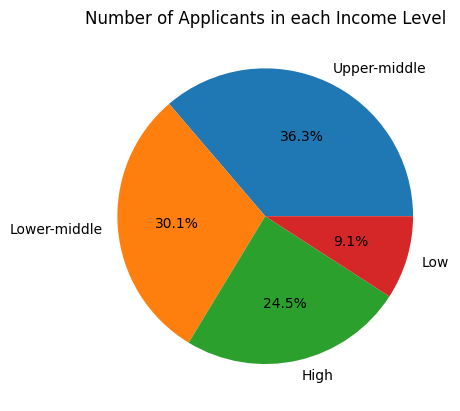

In [19]:
# Plotting a pie Chart
plt.pie(income['Number of Applicants'],labels=income['Income levels'],autopct='%1.1f%%')
plt.title('Number of Applicants in each Income Level')
plt.show()

Segment according to number of dependents

In [20]:
dependents=df['Dependent Levels'].value_counts().reset_index()
dependents=dependents.rename(columns={'count':'Number of Applicants'})
dependents.head()

,Dependent Levels,Number of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


Segment according to Education

In [21]:
education = df['education'].value_counts().reset_index()
education=education.rename(columns={'education':'Education level','count':'Number of Applicants'})
education.head()

,Education level,Number of Applicants
0,Graduate,2144
1,Not Graduate,2125


Segment according to Employment

In [22]:
employment=df['self_employed'].value_counts().reset_index()
employment=employment.rename(columns={'self_employed':'Self employment','count':'Number of Applicants'})
employment.head()

,Self employment,Number of Applicants
0,Yes,2150
1,No,2119


### Rate of Loan Approvals
##### Overal rate

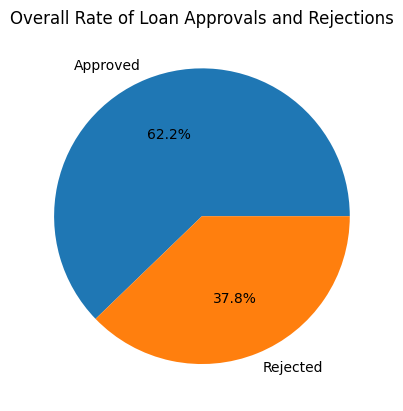

In [23]:
# General loan approval rate
loans=df['loan_status'].value_counts().reset_index()
loans=loans.rename(columns={'loan_status':'Loan Status','count':'Total'})
loans.head()
plt.pie(loans['Total'],labels=loans['Loan Status'],autopct='%1.1f%%')
plt.title('Overall Rate of Loan Approvals and Rejections')
plt.show()

Loan approvals according to level of education

In [24]:
#Grouping data by education and loan Status
education=df.groupby(['education','loan_status']).size().reset_index()

#filter to include appproved and rejected
education=education[education['loan_status'].isin(['Approved','Rejected'])]

education.head()


,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


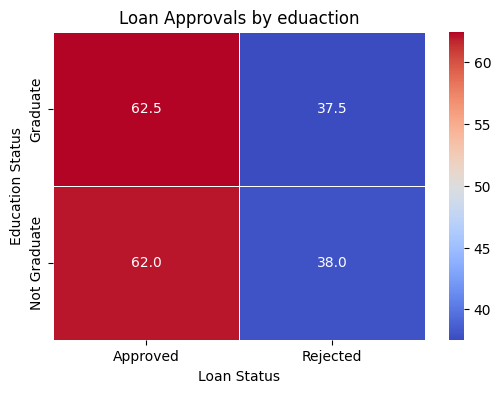

In [25]:
#create a pivot table
pivot_table=education.pivot(index='education',columns='loan_status',values=0)
row_totals=pivot_table.sum(axis=1)
percentage=pivot_table.div(row_totals,axis=0)*100

#create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage,annot=True,fmt='.1f',cmap='coolwarm',linewidth=0.5)

#Labelling the heatmap 
plt.title('Loan Approvals by eduaction')
plt.xlabel('Loan Status')
plt.ylabel('Education Status')
plt.show()

Loan Approvals according to type of employment

In [26]:
employment_type=df.groupby(['self_employed','loan_status']).size().reset_index()
#filter to include appproved and rejected
employment_type=employment_type[employment_type['loan_status'].isin(['Approved','Rejected'])]
employment_type=employment_type.rename(columns={0:'Total'})
employment_type.head()

,self_employed,loan_status,Total
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


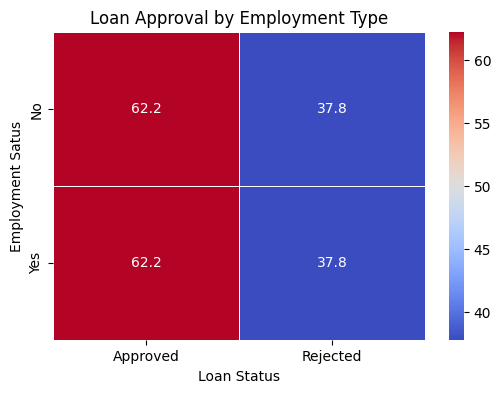

In [27]:
#pivot table
pivot_table=employment_type.pivot(index='self_employed',columns='loan_status',values='Total')
row_totals=pivot_table.sum(axis=1)
percentage=pivot_table.div(row_totals,axis=0)*100

#create heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage,annot=True,fmt='.1f',cmap='coolwarm',linewidth=0.5)

#Labelling the Heatmap
plt.title('Loan Approval by Employment Type')
plt.xlabel('Loan Status')
plt.ylabel('Employment Satus')
plt.show()


Loan Approvals rate according to CIBIL Rating

The Influence of CIBIL rating on loan approvals

In [28]:
#Group data according to CIBIL rating and loans status and count for each combination
cibil_rates=df.groupby(['CIBIL ratings','loan_status']).size().reset_index()
cibil_rates=cibil_rates.rename(columns={0:'Total'})
cibil_rates.head(9)

,CIBIL ratings,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


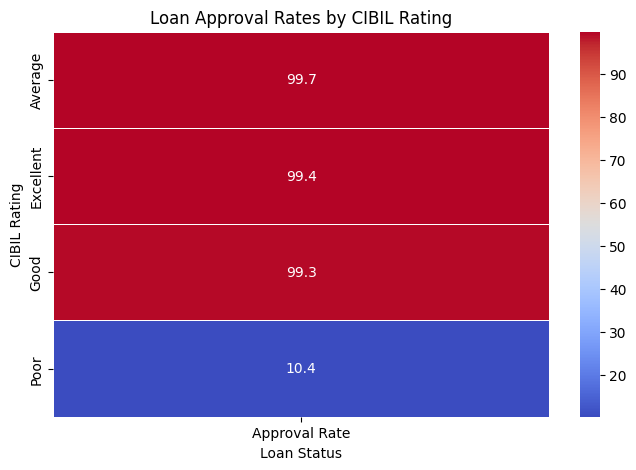

In [29]:
# Create a pivot table
pivot_table = cibil_rates.pivot(index='CIBIL ratings', columns='loan_status', values='Total')

# Calculate the approval rates
pivot_table['Approval Rate'] = (pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected'])) * 100

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table[['Approval Rate']], annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Labeling the heatmap
plt.title('Loan Approval Rates by CIBIL Rating')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Rating')
plt.show()


Correlation Analysis

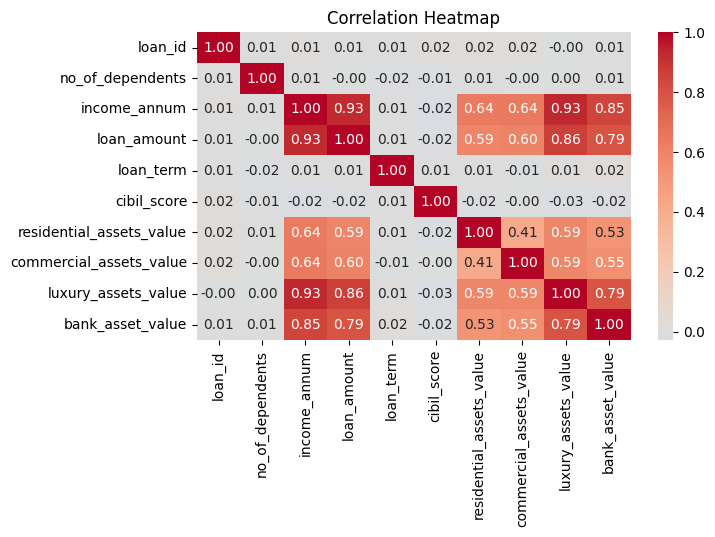

In [30]:
correlation_matrix=df.corr(numeric_only=True)
#Create the Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
#Correlation between asset value and income
assets =['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
income='income_annum'

#Calulate the correlation (Pearson correlation)
correlations=df[assets+[income]].corr()
correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [32]:
# Correlation between asset value and loan
assets =['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
loan='loan_amount'

#Calulate the correlation (Pearson correlation)
correlations=df[assets+[loan]].corr()
correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


### Asset value impact/influence on loan approval/elegibility
##### If There is a relation between asset value and getting a loan approval

In [33]:
# Splitting data into two groups based on loan status
approved =df[df['loan_status']=='Approved']
Rejected =df[df['loan_status']=='Rejected']

# Performing a t- test
assets=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
for columns in assets:
    t_stat,p_value=ttest_ind(approved[columns],Rejected[columns],equal_var=False)
    print(f"T-Test for {columns}:")
    print(f" T-Statistic:{t_stat}")
    print(f" P-Value: {p_value}")
    if p_value<0.05: #95% confidence level
        print(f" The Difference in {columns} between approved and rejected loans statistically significant")
    else:
        print(f" The differemce in {columns} between approved and rejected loans is not statistically significant")

T-Test for residential_assets_value:
 T-Statistic:-0.9399394365500209
 P-Value: 0.34731539500224484
 The differemce in residential_assets_value between approved and rejected loans is not statistically significant
T-Test for commercial_assets_value:
 T-Statistic:0.5387741456120381
 P-Value: 0.5900779272018966
 The differemce in commercial_assets_value between approved and rejected loans is not statistically significant
T-Test for luxury_assets_value:
 T-Statistic:-1.013970039592796
 P-Value: 0.3106683217824068
 The differemce in luxury_assets_value between approved and rejected loans is not statistically significant
T-Test for bank_asset_value:
 T-Statistic:-0.4448616890142232
 P-Value: 0.6564475917396153
 The differemce in bank_asset_value between approved and rejected loans is not statistically significant


**Using ANOVA to determine a correlation between income and asset value**

In [34]:
#In a NULL hypothesis : There is no relation between assets value and income 
#alternatice hypothesis : There exists a relationship(significant difference) between asset value and income


#Extracting values in columns
residential_assets=df['residential_assets_value']
commercial_assets=df['commercial_assets_value']
luxury_assets=df['luxury_assets_value']
bank_asset=df['bank_asset_value']
income=df['income_annum']


#Perform ANOVA
f_statistic,p_value=f_oneway(residential_assets,luxury_assets,bank_asset,income)
print('The f statisticis: ',f_statistic)
print('The P value is :',p_value)

#Interpretation of the results
if p_value<0.05:
    print('There is a significant influence of income on asset value')
else:
    print('There is no significant influence of income on assets value')

The f statisticis:  2725.1011154908774
The P value is : 0.0
There is a significant influence of income on asset value


**Test for significance between income and loan amount**

correlation between income and loan amount

In [35]:
income=df['income_annum']
loan=df['loan_amount']

#perform an independent t-test
print('The T-statistics:',t_stat)
print('The p value is: ',p_value)

if p_value <0.05:
    print('There is a statistical significant difference in loan amount and income per annum')
else:
    print('There is no statistical significant difference in loan amount and income per annum]')

The T-statistics: -0.4448616890142232
The p value is:  0.0
There is a statistical significant difference in loan amount and income per annum


Box plot to represent Correlation between loan status and number of dependents

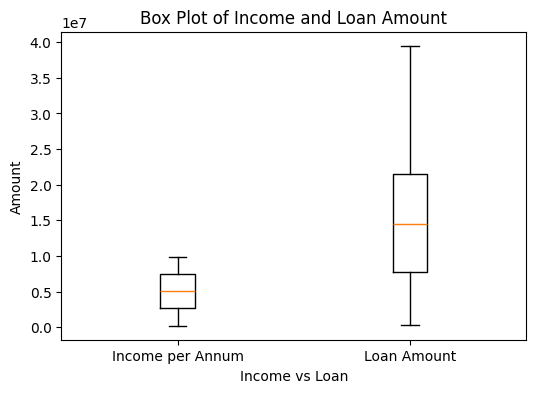

In [36]:
income=df['income_annum']
loan=df['loan_amount']

#create the figure
plt.figure(figsize=(6,4))
ax=plt.axes()

#plotting the box plots
ax.boxplot([income,loan],labels=['Income per Annum','Loan Amount'])

#Chart Labels
plt.xlabel('Income vs Loan')
plt.ylabel('Amount')
plt.title('Box Plot of Income and Loan Amount')
plt.show()

**Chi-Square Analysis: Determine correlation between loan status and number of dependents**

In [41]:
# creating a contingency Table
contingency_table=pd.crosstab(df['loan_status'],df['Dependent Levels'])
# Perform chi-square
chi2,p_value,dof,expected=stats.chi2_contingency(contingency_table)

print('Chie-square test statistic: ',chi2)
print('The P-value is: ',p_value)
print('The dof is: ',dof)
#Set the significance level
alpha=0.5
if p_value<alpha:
    print('There ia a statistically significant relationship between loan status and the number of dependents')
else:
    print('There is no ststistically significant relationship between loan status and the number of dependents')

Chie-square test statistic:  1.1296798036848839
The P-value is:  0.5684511474541935
The dof is:  2
There is no ststistically significant relationship between loan status and the number of dependents


### **Logistic Regression**

In [44]:
def edu_status(status):
               if status=='Graduate':
                       return 1
               elif status =='Not Graduate':
                       return 0
               else:
                       return 'Unknown'
df['edu status']=df['education'].apply(edu_status)

def type_employment(status):
               if status=='Yes':
                       return 1
               elif status =='No':
                       return 0
df['Employment Type']=df['self_employed'].apply(type_employment)

def loan_approval(status):
               if status=='Approved':
                       return 1
               elif status =='Rejected':
                       return 0
df['Loan Approval']=df['loan_status'].apply(loan_approval)
df.head()



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,bank_asset_value,loan_status,CIBIL ratings,Income levels,Loan Rating,Loan Term Type,Dependent Levels,edu status,Employment Type,Loan Approval
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,...,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,...,3300000,Rejected,Poor,Upper-middle,Silver,Intermediate,Low,0,1,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,...,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate,1,0,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,...,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,...,5000000,Rejected,Poor,High,Gold,Long-Term,High,0,1,0


In [49]:
#seperating x-axis values 
X=df.drop(columns={'loan_id','CIBIL ratings','Income levels',
                  'Loan Rating','Loan Term Type','Dependent Levels','Loan Approval','loan_status','education','self_employed'})
X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status,Employment Type
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,0


In [50]:
#Defining the y-axis
y=df['Loan Approval']
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: Loan Approval, Length: 4269, dtype: int64

Importing The Regression Model Modules

In [51]:
#Importing Logistic regression module

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [52]:
#Split data to test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [53]:
#rows and columns for training set
X_train

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status,Employment Type
4084,0,9300000,29400000,10,351,24200000,6800000,35800000,6100000,0,1
3556,5,5200000,20700000,2,538,3200000,2000000,14600000,3600000,1,0
2323,1,1900000,4500000,12,742,1200000,2000000,4400000,1200000,0,1
740,3,4100000,15900000,12,538,3900000,800000,8800000,5700000,0,0
1215,5,9600000,38000000,10,359,2100000,13600000,38200000,9400000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1646,0,5900000,20300000,4,806,300000,3700000,16400000,4800000,0,0
840,4,3500000,8900000,4,478,4000000,3900000,11300000,3800000,1,1
1144,1,8400000,24600000,14,817,1800000,13100000,31300000,8200000,0,0
48,3,5500000,20500000,12,634,800000,8600000,18500000,8200000,0,0


In [54]:
X_test

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status,Employment Type
3133,4,700000,2300000,16,688,1500000,300000,1900000,400000,1,0
4053,1,7000000,20300000,14,837,7700000,2200000,19700000,5500000,0,1
610,3,8100000,23900000,10,449,7100000,6100000,28300000,8900000,1,0
3177,3,4900000,13100000,18,401,5700000,4100000,16400000,3600000,1,1
607,0,6000000,13100000,6,385,16600000,7600000,22000000,7400000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
885,2,5200000,13500000,2,777,7000000,5200000,15500000,6100000,1,0
804,2,800000,2100000,6,726,2000000,0,2600000,600000,0,1
4180,3,9700000,30800000,18,471,12700000,3800000,37300000,10400000,0,1
1078,5,9800000,37900000,18,301,6700000,4900000,34300000,6200000,0,1


**Scaling our Data**

In [55]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [56]:
X_train_scaled

array([[-1.46148376,  1.48642509,  1.54664878, ...,  0.32060948,
        -1.00268097,  0.99266412],
       [ 1.47642896,  0.02091063,  0.58652234, ..., -0.44959563,
         0.9973262 , -1.00739009],
       [-0.87390121, -1.15864979, -1.20129933, ..., -1.18899253,
        -1.00268097,  0.99266412],
       ...,
       [-0.87390121,  1.16472679,  1.01692385, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [ 0.30126387,  0.12814339,  0.56445046, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [-0.87390121,  1.5579136 ,  0.50927078, ...,  0.35141768,
        -1.00268097, -1.00739009]])

In [57]:
X_test_scaled

array([[ 0.88884642, -1.58758085, -1.44408992, ..., -1.43545817,
         0.9973262 , -1.00739009],
       [-0.87390121,  0.66430722,  0.54237859, ...,  0.13576025,
        -1.00268097,  0.99266412],
       [ 0.30126387,  1.05749403,  0.93967229, ...,  1.1832392 ,
         0.9973262 , -1.00739009],
       ...,
       [ 0.30126387,  1.62940211,  1.70115189, ...,  1.64536226,
        -1.00268097,  0.99266412],
       [ 1.47642896,  1.66514636,  2.48470336, ...,  0.35141768,
        -1.00268097,  0.99266412],
       [-0.28631867, -0.01483363,  0.15612082, ..., -0.20313   ,
        -1.00268097,  0.99266412]])

In [58]:
#Training the model
log_reg=LogisticRegression(random_state=0).fit(X_train_scaled,y_train)

In [59]:
#Predict
log_reg.predict(X_train_scaled)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
#Accuracy
log_reg.score(X_train_scaled,y_train)

0.9200133868808568

In [61]:
#Application of model to new dataset
log_reg.score(X_test_scaled,y_test)

0.912568306010929